In [2]:
%run -t ../src/karplus_angles.py

Cargando: ../data/structures.csv ... OK!
Cargando: ../data/train.csv ... OK!
Armando struct_dict OK!
 Filtrando 3JHH
Cantidad de datos en ds_trn_f: 590611
 Done (0, 590611), ELP=93.31s

IPython CPU timings (estimated):
  User   :      98.64 s.
  System :       0.92 s.
Wall time:      98.38 s.


In [3]:
ret_d_trn.keys()

dict_keys(['idx_v', 'C0C1_dist_v', 'cos_coupling_v', 'H0_neighbours_dist_v', 'H1_neighbours_dist_v', 'neighbours_atoms_v'])

In [5]:
ret_d_trn["cos_coupling_v"].shape

(590611, 3)

In [6]:
diedral_cos = ret_d_trn["cos_coupling_v"][:,0]
#diedral_ang = np.acos()

In [11]:
plt.style.use('dark_background')

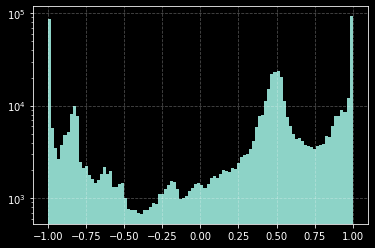

In [14]:
plt.hist(diedral_cos, bins=100, log=1);
plt.grid(ls='--', alpha=0.3)

In [19]:
ds_trn_f["scalar_coupling_constant"].shape

(590611,)

In [22]:
g = ds_trn_f["scalar_coupling_constant"]

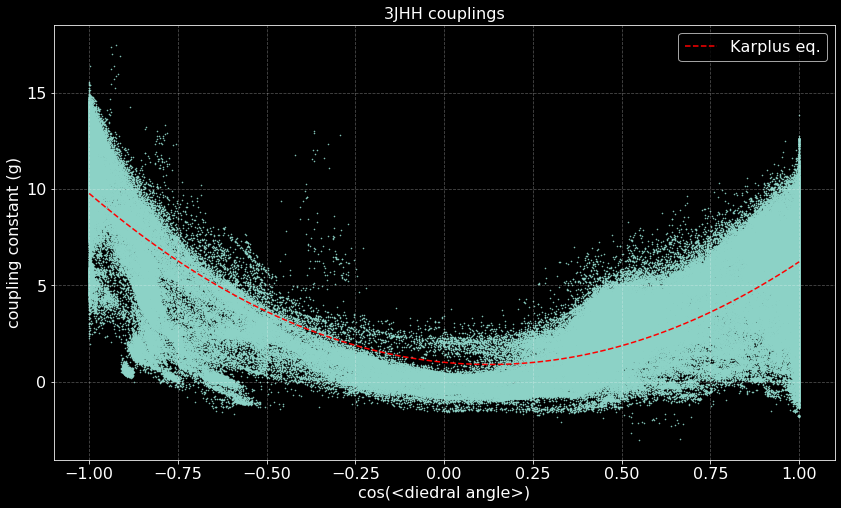

In [55]:
plt.figure(figsize=(14,8))
plt.scatter(diedral_cos, g, s=0.3)

# define a domain
x = np.linspace(diedral_cos.min(), diedral_cos.max(), 100)

# Karplus fit
pfit = np.polyfit(diedral_cos, g, deg=2)
plt.plot(x, pfit[0]*x**2 + pfit[1]*x + pfit[2], '--r', label='Karplus eq.')

# higher polynomial (not worth it actually)
#pfit_hi = np.polyfit(diedral_cos, g, deg=9)
#plt.plot(x, np.dot(pfit_hi, [x**n for n in range(pfit_hi.size)]), '--b', label='higher polynomial')

plt.grid(ls='--', alpha=.3)
plt.ylabel("coupling constant (g)", fontsize=16)
plt.xlabel("cos(<diedral angle>)", fontsize=16)
plt.title("3JHH couplings", fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(loc='best', fontsize=16)